### [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost) [Classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) & [Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)
- Fits a *sequence of weak learners* on repeatedly modified versions of a dataset.
- Combines the predictions via a *weighted majority voting* system.
- Uses a *weights vector* ($w_1, w_2, w_N$) to boost each training sample - each weight is initialized to 1/N
- Incorrectly predicted samples have their weights *increased* for subsequent runs.
- Correctly predicted samples have their weights *decreased* for subsequent runs.
- Therefore, subsequent learners are forced to concentrate on examples that were previously missed.

In [8]:
# AdaBoost on 100 weak classifiers
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y   = load_iris(return_X_y=True)
clf    = AdaBoostClassifier(n_estimators=100) 
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

- `n_estimators` controls the numbers of learners.
- `learning_rate` controls the contribution of weak learners in the final combination.
- Weak learners are, in effect, decision stumps.
- `base_estimator` controls the estimator method.

### [example: Discrete vs Real AdaBoost](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py)
- Binary classification task.
- Discrete __SAMME__ AdaBoost adapts based on __errors in predicted class labels__
- Real __SAMME.R__ uses predicted class probabilities.
- Y is nonlinear function with 10 inputs.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier as ABC

In [10]:
from sklearn import datasets
X, y = datasets.make_hastie_10_2(n_samples=12_000, random_state=1)

# params
n_estimators = 400
learning_rate = 1.0

# split
from sklearn.model_selection import train_test_split as TTS
from sklearn.tree            import DecisionTreeClassifier as DTC

X_train, X_test, y_train, y_test = TTS(X,y,test_size=2_000,shuffle=False)

# decision trees & error scores
dt_stump = DTC(max_depth=1, min_samples_leaf=1)
dt       = DTC(max_depth=9, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt.fit(      X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)
dt_err =       1.0 - dt.score(      X_test, y_test)

# classifiers
from sklearn.ensemble import AdaBoostClassifier as ABC

ada_discrete = ABC(
    estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME",
)
ada_real = AdaBoostClassifier(
    estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R",
)
ada_real.fit(    X_train, y_train)
ada_discrete.fit(X_train, y_train)

# compute test error of both classifiers for each new stump in n_estimators added to the ensemble.
import numpy as np
from sklearn.metrics import zero_one_loss

ada_discrete_err       = np.zeros((n_estimators,))
ada_discrete_err_train = np.zeros((n_estimators,))
ada_real_err           = np.zeros((n_estimators,))
ada_real_err_train     = np.zeros((n_estimators,))

for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

compute the test error of the discrete and real AdaBoost classifiers for each new stump in n_estimators added to the ensemble.for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)


SyntaxError: invalid syntax (1043113200.py, line 58)

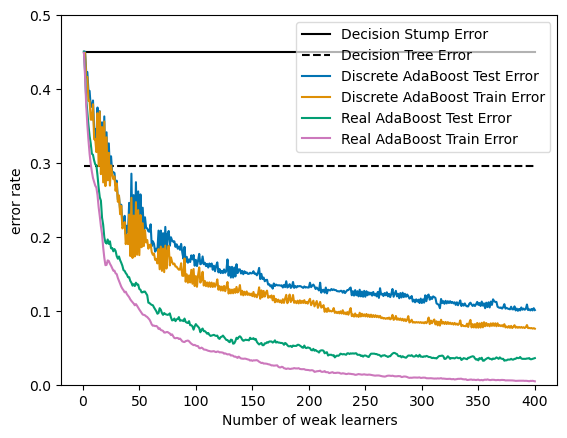

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, "k-", label="Decision Stump Error")
ax.plot([1, n_estimators], [dt_err] * 2, "k--", label="Decision Tree Error")

colors = sns.color_palette("colorblind")

ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err,
    label="Discrete AdaBoost Test Error",
    color=colors[0],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err_train,
    label="Discrete AdaBoost Train Error",
    color=colors[1],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[2],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[4],
)

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("error rate")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

### [example: Multiclass AdaBoost](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py) 
- Compares accuracy of *SAMME* (classification only) to *SAMME.R* (updates additive model)
- Dataset: 10-dimensional std normal distribution
- __3 classes separated by nested, concentric 10-D spheres__
- Roughly equal numbers of samples in each class
- Expectation: SAMME.R should converge faster, with lower test error
- Algorithm error on the left; classification error in the middle; boost weights on the right.

In [17]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(
    n_samples=2_000, n_features=10, n_classes=3, random_state=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42)

from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC

weak_learner = DTC(max_leaf_nodes=8)
n_estimators = 300

adaboost_clf = ABC(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

In [18]:
# measure convergence
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier()

def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

weak_learners_misclassification_error = misclassification_error(
    y_test, weak_learner.fit(X_train, y_train).predict(X_test))

dummy_classifiers_misclassification_error = misclassification_error(
    y_test, dummy_clf.fit(X_train, y_train).predict(X_test))

print(
    "DecisionTreeClassifier's misclassification_error: "
    f"{weak_learners_misclassification_error:.3f}")
print(
    "DummyClassifier's misclassification_error: "
    f"{dummy_classifiers_misclassification_error:.3f}")

DecisionTreeClassifier's misclassification_error: 0.475
DummyClassifier's misclassification_error: 0.692


After training the DecisionTreeClassifier, the achieved error is greater than the expected value that would have been obtained by guessing the most frequent class label, as the DummyClassifier does.

Now, we calculate the __misclassification_error (1 - accuracy)__, of the additive model (DecisionTreeClassifier) at each boosting iteration on the test set to assess its performance.

__staged_predict__ makes as many iterations as the number of fitted estimators (`n_estimators`). At iteration n, the predictions of AdaBoost only use the n first weak learners. We compare these predictions with the true predictions y_test and we, therefore, conclude on the benefit (or not) of adding a new weak learner into the chain.

We plot the misclassification error for the different stages:

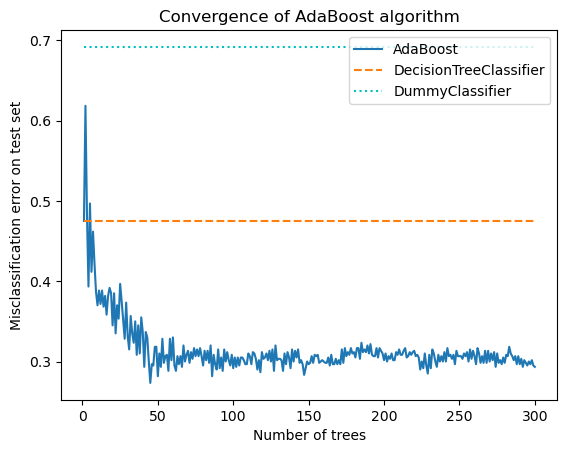

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")
ax = boosting_errors.plot()
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")

plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [weak_learners_misclassification_error, weak_learners_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [
        dummy_classifiers_misclassification_error,
        dummy_classifiers_misclassification_error,
    ],
    color="c",
    linestyle="dotted",
)
plt.legend(["AdaBoost", "DecisionTreeClassifier", "DummyClassifier"], loc=1)
plt.show()

- The plot shows the missclassification error on the test set after each boosting iteration. The boosted trees error converges to ~0.3 after 50 iterations (indicating a significantly higher accuracy compared to a single tree - the dashed line in the plot).

- The misclassification error jitters because the SAMME algorithm uses the discrete outputs of the weak learners to train the boosted model.

- AdaBoostClassifier convergence factors: `learning_rate`, `n_estimators`, and the expressivity of the weak learners (`max_leaf_nodes`).

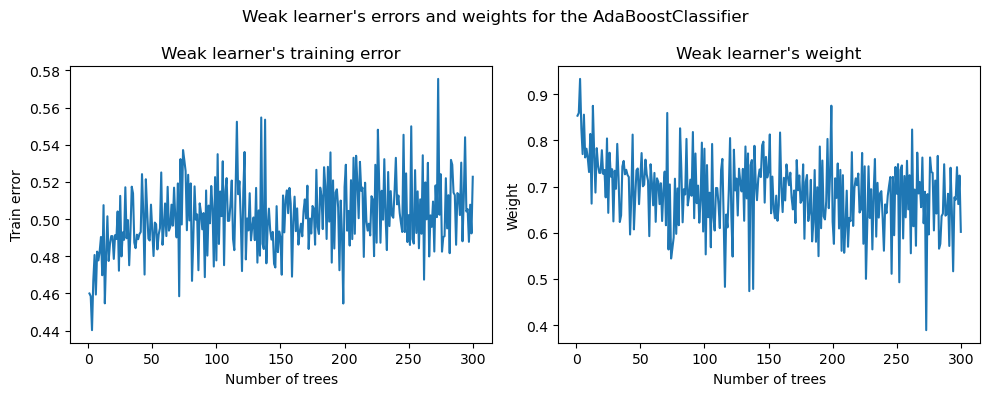

In [20]:
# AdaBoost is a forward stagewise additive model. What's the relationship between the weights of weak learners and their performance?
# Use the fitted AdaBoostClassifier’s attributes estimator_errors_ and estimator_weights_ to see.
    
weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,AdaBoost is a forward stagewise additive model. We now focus on understanding the relationship between the attributed weights of the weak learners and their statistical performance.

We use the fitted AdaBoostClassifier’s attributes estimator_errors_ and estimator_weights_ to investigate this link.AdaBoost is a forward stagewise additive model. We now focus on understanding the relationship between the attributed weights of the weak learners and their statistical performance.

We use the fitted AdaBoostClassifier’s attributes estimator_errors_ and estimator_weights_ to investigate this link.
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(
    subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="tab:blue"
)
axs[0, 0].set_ylabel("Train error")
axs[0, 0].set_title("Weak learner's training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner's weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner's errors and weights for the AdaBoostClassifier")
fig.tight_layout()

- Left plot: the weighted error of each weak learner on the reweighted training set at each boosting iteration.
- Right plot: the weights associated with each weak learner later used to make the predictions of the final additive model.
- The __error of the weak learner is the inverse of the weights__, so an additive model will trust more a weak learner that makes smaller errors (on the training set) by increasing its impact on the final decision.

### [example: AdaBoost, 2-classes](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py)

- Fit an AdaBoosted decision stump on a non-linearly separable classification dataset composed of __two “Gaussian quantiles” clusters__ & plot the decision boundary and decision scores.
- The distributions of decision scores are shown for samples of class A and B. The predicted class label for each sample is determined by the sign of the decision score.
- Samples with decision scores greater than zero are "B", otherwise "A". The magnitude of a decision score determines the degree of likeness with the predicted class label.
- Additionally, a new dataset could be constructed containing a desired purity of "B" by selecting samples with a decision score above some value.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = ABC(DTC(max_depth=1), algorithm="SAMME", n_estimators=200)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

/tmp/ipykernel_21136/2915561174.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],


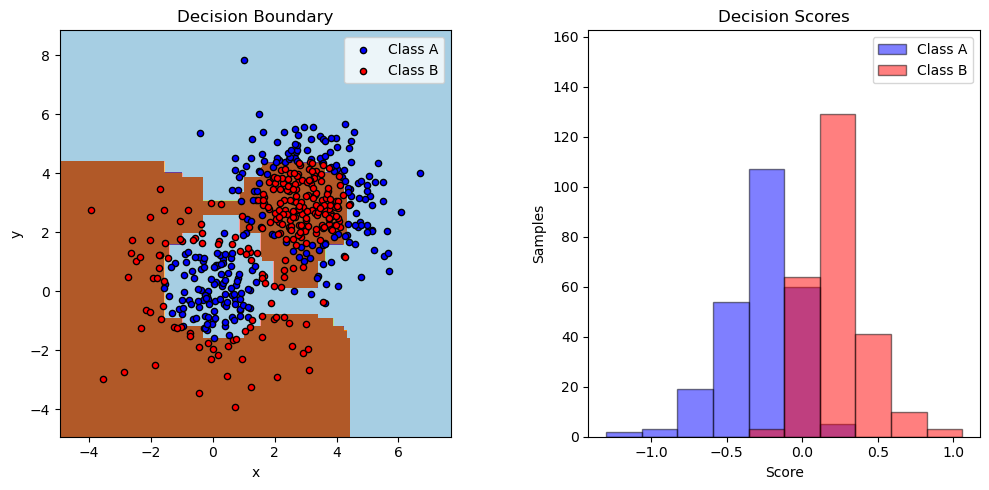

In [22]:
plot_colors, plot_step, class_names = "br", 0.02, "AB"

plt.figure(figsize=(10, 5))

# decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Decision Boundary')

# two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
    
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples'); plt.xlabel('Score'); plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

### [example: Decision Tree Regression with AdaBoost](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py)
- 1D sinusoidal data with Gaussian noise

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as ABR

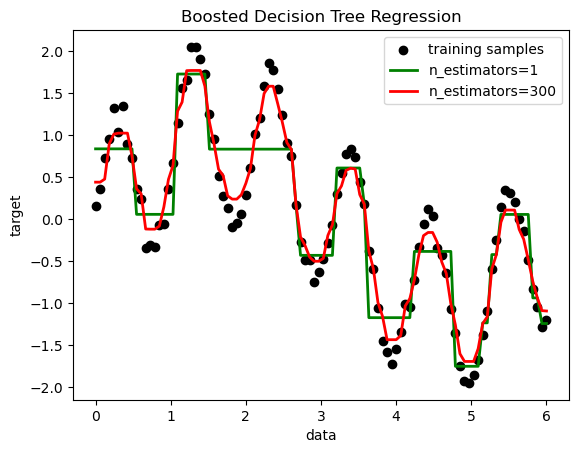

In [35]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 =     DTR(max_depth=4)
regr_2 = ABR(DTR(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X,y); regr_2.fit(X,y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()